# part: 1, import importants files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #converts text reviews into numerical features using TF-IDF (Term Frequency – Inverse Document Frequency).
from sklearn.naive_bayes import MultinomialNB #implements the Multinomial Naive Bayes algorithm for text classification.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# nltk modules

import nltk #library for text preprocessing & NLP tasks.
nltk.download('stopwords') #→ downloads a list of stopwords (like is, the, and), which don’t carry much meaning.
nltk.download('punkt') #→ downloads a tokenizer (splits text into words or sentences).
nltk.download('punkt_tab')
from nltk.corpus import stopwords #lets you remove stopwords from your reviews.
from nltk.stem import PorterStemmer #reduces words to their root form (e.g., running → run, better → bet).
import re #regular expressions, used to clean text (remove punctuation, HTML tags, numbers, etc.).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# ** part: 2 Load the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/house_data/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.shape

(50000, 2)

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data['review'].value_counts()

,count
review,
"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",5
"Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favorite movie. Ever since I was a little girl, I've dreamed of owning a blue van with flames and an observation bubble.<br /><br />The cliché characters in ridiculous situations are what make this film such great fun. The wonderful comedic chemistry between Stephen Furst (Harold) and Andy Tennant (Melio) make up most of my favorite parts of the movie. And who didn't love the hopeless awkwardness of Flynch? Don't forget the airport antics of Leon's cronies, dressed up as Hari Krishnas: dancing, chanting and playing the tambourine--unbeatable! The clues are genius, the locations are classic, and the plot is timeless.<br /><br />A word to the wise, if you didn't watch this film when you were little, it probably won't win a place in your heart today. But nevertheless give it a chance, you may find that ""It doesn't matter what you say, it doesn't matter what you do, you've gotta play.""",4
"You do realize that you've been watching the EXACT SAME SHOW for eight years, right? I could understand the initial curiosity of seeing strangers co-exist on an Island, but you'd think that after watching unkempt, stink-ladened heroes run roughshod through the bush with an egg on a spoon for half a decade would be enough to get you to commit to something a little more original (and interesting).<br /><br />And I'm not even speaking of the shows validity which for the record I find questionable. It's just hard to suspend disbelief for ""Bushy Bill"" eating a rat when the entire crew of producers and camera people are housed in an air conditioned make-shift bio-dome sipping frosty mochcinno's with moxy.<br /><br />What's the appeal here? I don't care about these people or their meandering lives. I just don't get it. But if you DO find yourself being captivated by hairy, unwashed people, I suggest you turn off your TV and just take a trip to your local bus station where you can see people like this in their TRUE habitat. They call them HOMELESS PEOPLE, and free of charge, you can sit back and marvel in their uncanny ability to retrieve various cigarette debris from a plethora of garbage canisters, eventually striking ""pay-dirt"" and fashioning a homemade Dr. Frankenstein-styled cancer-stick, all the while begging people for change for food when the stink of ""Aqua Velva"" on their breath is enough to suggest otherwise. And the best part? Much like Survivor, every week one member of the tribe ""Leaves"" the ""Island"" when they are unceremoniously sent packing to the local Institution when the frightening unmedicated state of full-blown schizophrenia kicks into gear! Now THAT'S ENTERTAINMENT!",3
"I see that C. Thomas Howell has appeared in many movies since his heyday in the 80s as an accomplished young actor.<br /><br />I bought this DVD because it was cheap and in part for the internet-related plot and to see how much older C. Thomas Howell is; I do not recall seeing him in any movies since the 1980s.<br /><br />In just a few words: what a very big disappointment. I give some low budget movies a chance, but this one started out l

#part: 3, EDA

In [ ]:
data.isnull().sum() #no null values

,0
review,0
sentiment,0


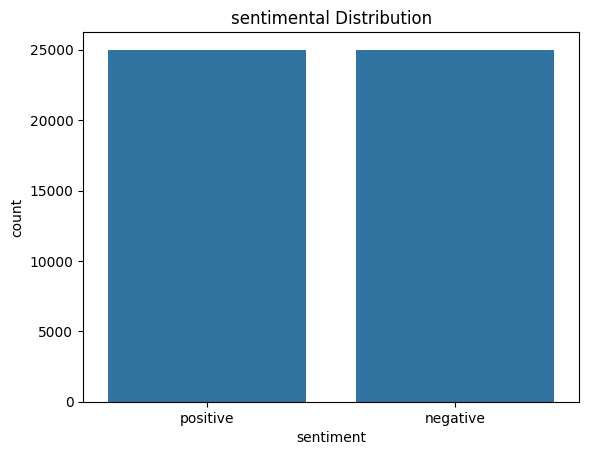

In [ ]:
# for see data is balance or not
sns.countplot(x='sentiment', data=data)
plt.title("sentimental Distribution")
plt.show()

In [ ]:
# for duplicates
print("Reviews Duplicates: ",data.duplicated().sum())

Reviews Duplicates:  418


In [ ]:
# remove the duplicates
data = data.drop_duplicates()
data.shape

(49582, 2)

# step: 4, Preprocessing The raw text has noise (HTML tags, punctuation, stopwords), and we must clean + prepare it before giving it to the model.
#postive -> 1
#negtive -> 0


In [ ]:
print(data['sentiment'].unique())
#Clean and lowercase the sentiment column
data['sentiment'] = data['sentiment'].str.strip().str.lower()

['positive' 'negative']


In [ ]:
# encode target values
# Correct encoding
data['sentiment'] = data['sentiment'].map({'positive':1, 'negative':0})


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#Lowercase – “Good” and “good” should be treated the same.
#Remove punctuation/special characters/HTML tags – they don’t help sentiment.
#Remove stopwords – words like “is, the, and” don’t add meaning.
#Stemming/Lemmatization (optional) – reduce words to root form (playing → play).#

In [ ]:
stop_words =set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
# preprocessing function
def preProcess_text(text):
#text to lower text
 text=text.lower()

 #remove tags
 text = re.sub(r'<.*?>', '', text)

 #remove special character and digit
 text = re.sub(r'[^a-zA-Z\s]', '', text)

 words = nltk.word_tokenize(text)

    # Remove stopwords
 words = [word for word in words if word not in stop_words]
    # Stemming
 words = [stemmer.stem(word) for word in words]
    # Join back with spaces
 return " ".join(words)


In [ ]:
#data['clean_review'] = data['review'].apply(preProcess_text)
from tqdm import tqdm
tqdm.pandas()

data['clean_review'] = data['review'].progress_apply(preProcess_text)
print(data[['review', 'clean_review']].head())

100%|██████████| 49582/49582 [03:00<00:00, 274.78it/s]

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one review mention watch oz episod youll hook ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film...  


#part 5: Split the Data

In [ ]:
Xtrain, Xtest, ytrain, ytest =train_test_split(data['clean_review'], data['sentiment'], test_size=0.2, random_state=42, stratify=data['sentiment'])
print("Training samples:", len(Xtrain))
print("Testing samples:", len(Xtest))

Training samples: 39665
Testing samples: 9917


**Step 6: Text Vectorization**
**Convert cleaned reviews into numerical features using TF-IDF Vectorizer with a max**
**feature limit of 5000.**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000) #Keeps only the top 5000 most important words (based on frequency & relevance).

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(Xtrain)
X_test_tfidf = tfidf.transform(Xtest)

X_train_tfidf.shape
X_test_tfidf.shape


(9917, 5000)

In [ ]:
# Get the words (features) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Show first 20 words
print(feature_names[:20])

# Show total number of features
print("Total features:", len(feature_names))

# If you want to see all 5000 words
print(feature_names)


['aaron' 'abandon' 'abc' 'abduct' 'abil' 'abl' 'aboard' 'abomin' 'abort'
 'abound' 'abraham' 'abrupt' 'abruptli' 'absenc' 'absent' 'absolut'
 'absorb' 'abstract' 'absurd' 'abund']
Total features: 5000
['aaron' 'abandon' 'abc' ... 'zombi' 'zone' 'zoom']


#Step 7: Model Training


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_test_tfidf,ytest)
y_pred = nb_model.predict(X_test_tfidf)

#Step 8: Model Evaluation


In [ ]:
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8798023595845518


In [ ]:
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.88      0.88      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917


Confusion Matrix:
[[4347  593]
 [ 599 4378]]


#Step 9: Identify Important Words from trained model


In [ ]:
#Since you’re using Multinomial Naive Bayes, it assigns log probabilities to each word for each class.
 #Words with higher probabilities in a class are the ones that push predictions toward that class.

feature_names = tfidf.get_feature_names_out()
class_labels = nb_model.classes_
word_probs =nb_model.feature_log_prob_
topn = 20

for i, label in enumerate(class_labels):
    top_words = np.argsort(word_probs[i])[-topn:]  # get top n indices
    print(f"\nTop {topn} words for class {label}:")
    for j in top_words:
        print(f"{feature_names[j]}")


Top 20 words for class 0:
stori
dont
scene
see
look
act
realli
would
charact
time
make
get
good
even
watch
bad
like
one
film
movi

Top 20 words for class 1:
also
play
best
make
get
realli
well
charact
watch
show
time
see
stori
love
good
great
like
one
movi
film


#Step 10: Save Model and Vectorizer
#Save both the trained model and TF-IDF vectorizer using pickle for future use.

In [ ]:
import pickle

# Save the trained Naive Bayes model
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(nb_model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)

print("✅ Model and Vectorizer saved successfully!")

✅ Model and Vectorizer saved successfully!
